## Analyse wind

In [10]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
%matplotlib notebook

In [13]:
# Output of simulation

# Idealized data
ds_ideal1 = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-3D_DOM01_ML_0001.nc')
ds_ideal2 = xr.open_dataset('../../../../out/idealized_1712_1812/FIONA_idealized-3D_DOM01_ML_0002.nc')

# reference data
ds_ref1 = xr.open_dataset('../../../../out/reference_1712_1812/FIONA-3D_DOM01_ML_0001.nc')
ds_ref2 = xr.open_dataset('../../../../out/reference_1712_1812/FIONA-3D_DOM01_ML_0001.nc')

In [38]:
x = ds_ideal1.lon.values
y = ds_ideal1.lat.values

In [15]:
# Center
center_ideal = np.load('../Data/tmp_center_1to33.npy')
#center_ref = np.load('../Data/??')

In [20]:
# number of timesteps
ntime1 = len(ds_ideal1.time)
ntime2 = len(ds_ideal2.time)

# number of levels
nlev = len(ds_ideal1.height)
# Last level of center
last_lev = len(center_ideal[0])

#### Single level analysis
For simplicitiy only a single level is chosen here.

In [41]:
# Select single level (here 3910)
ds_ideal1.z_ifc[60,0,0]

# Add u_phi and u_r
u_phi1 = ds_ideal1.u[:,60,:].copy()
u_phi1.name = 'u_phi'
u_phi1.attrs['standard_name'] = 'tangential_wind'

u_r1 = ds_ideal1.u[:,60,:].copy()
u_r1.name = 'u_r'
u_r1.attrs['standard_name'] = 'radial_wind'

# single level center
center_1lev = center_ideal[:,(len(center_ideal)-30),:]

u = ds_ideal1.u[:,60,:]
v = ds_ideal1.v[:,60,:]

In [43]:
for t in range(0,ntime1):
    center_1ts = center_1lev[t]
    
    # Create polar coordinate grid
    x0 = center_1ts[0]
    y0 = center_1ts[1]
    
    #r = np.sqrt((x-x0)**2 + (y-y0)**2)
    phi = np.arctan2((y-y0), (x-x0))

    # unit vectors
    e_r = np.array([np.cos(phi), np.sin(phi)])
    e_phi= np.array([-np.sin(phi), np.cos(phi)])

    u_r[t,0]   = e_r[0]*u[t] + e_r[1]*v[t]
    u_phi[t,0] = e_phi[0]*u[t] + e_phi[1]*v[t]



ValueError: operands could not be broadcast together with shapes (1126,) (1112,) 

In [44]:
y0

10.687999725341797

In [30]:
ds_ideal1.u[:,60,:]

<xarray.DataArray 'u' (time: 25, lat: 1126, lon: 1112)>
[31302800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2016-08-17T12:00:00 ... 2016-08-18
  * lon      (lon) float32 -46.0 -45.982 -45.964 ... -26.038 -26.02 -26.002
  * lat      (lat) float32 5.0 5.012 5.024 5.036 ... 18.464 18.476 18.488 18.5
    height   float64 61.0
Attributes:
    standard_name:  eastward_wind
    long_name:      Zonal wind
    units:          m s-1
    param:          2.2.0

<IPython.core.display.Javascript object>


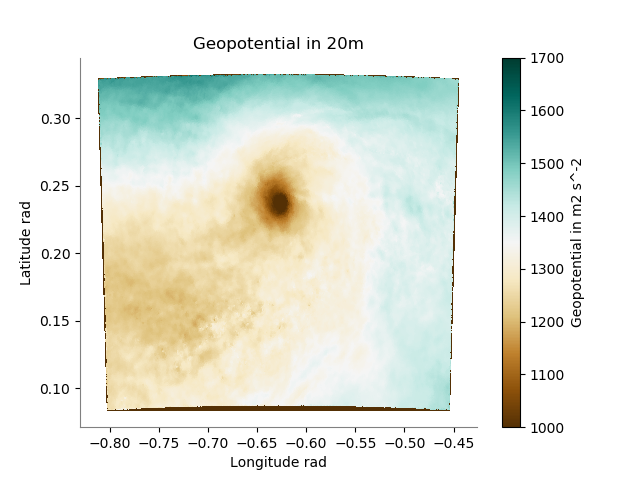

Text(0, 0.5, 'Geopotential in m2 s^-2')

/sw/tools/python/anaconda3/2019.03/skl/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, ' m s^-1')

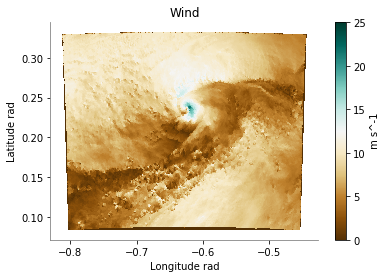

<IPython.core.display.Javascript object>


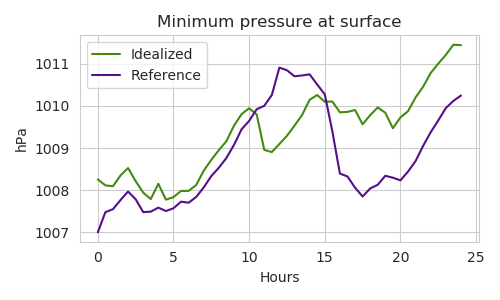

array([   0.        ,   49.65517241,   99.31034483,  148.96551724,
        198.62068966,  248.27586207,  297.93103448,  347.5862069 ,
        397.24137931,  446.89655172,  496.55172414,  546.20689655,
        595.86206897,  645.51724138,  695.17241379,  744.82758621,
        794.48275862,  844.13793103,  893.79310345,  943.44827586,
        993.10344828, 1042.75862069, 1092.4137931 , 1142.06896552,
       1191.72413793, 1241.37931034, 1291.03448276, 1340.68965517,
       1390.34482759, 1440.        ])

<IPython.core.display.Javascript object>


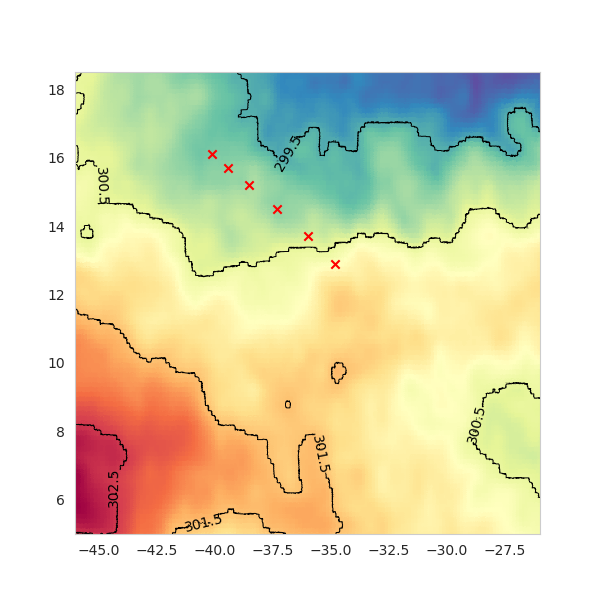